# Using Inbuilt Naive Bayes Classifier

In [1]:
#Various models required
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [2]:
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category

#change the path of dataset as required
X  =[] 
Y = []
for category in os.listdir("C:/Users/Yash Aryan/Desktop/Text Classification/Datasets"):
    for document in os.listdir("C:/Users/Yash Aryan/Desktop/Text Classification/Datasets/"+category):
        with open("C:/Users/Yash Aryan/Desktop/Text Classification/Datasets/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can see it is a tuple with first element as name of document and second text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [5]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [6]:
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))

14997
5000


In [7]:
#Example for showing re.split
sample_text="Hey! I am Anshika. I am superb. What are you doing there?"
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Anshika', 'I', 'am', 'superb', 'What', 'are', 'you', 'doing', 'there', '']


In [8]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'newsgroups': 15318,
 'rec': 4870,
 'sport': 1791,
 'hockey': 1518,
 'path': 15278,
 'cantaloupe': 19551,
 'srv': 24224,
 'cmu': 39068,
 'edu': 123135,
 'crabapple': 4614,
 'andrew': 3305,
 'news': 25895,
 'sei': 4621,
 'cis': 4252,
 'ohio': 11842,
 'state': 14032,
 'zaphod': 6206,
 'mps': 6878,
 'uwm': 1450,
 'linac': 368,
 'att': 1763,
 'bgsuvax': 29,
 'sesrock': 3,
 'andy': 458,
 'bgsu': 120,
 'stuart': 40,
 'esrock': 3,
 'subject': 16178,
 'bruins': 191,
 'message': 16481,
 'organization': 14896,
 'bowling': 25,
 'green': 452,
 'university': 7544,
 'references': 9774,
 'blue': 733,
 'pitt': 1455,
 'date': 15613,
 'thu': 1445,
 'apr': 15379,
 'gmt': 13348,
 'lines': 15689,
 'joseph': 440,
 'stiehm': 15,
 'writes': 11048,
 'come': 1964,
 'boston': 586,
 'hell': 799,
 'seven': 238,
 'wins': 163,
 'row': 90,
 'choke': 35,
 'well': 4597,
 'another': 2142,
 'brian': 767,
 'sutter': 40,
 'team': 1394,
 'ground': 593,
 'dirt': 83,
 'intensity': 39,
 'regular': 335,
 'season': 655,
 'burne

In [9]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 123135),
 ('cmu', 39068),
 ('com', 37576),
 ('news', 25895),
 ('not', 25065),
 ('srv', 24224),
 ('cantaloupe', 19551),
 ('net', 19222),
 ('message', 16481),
 ('subject', 16178),
 ('lines', 15689),
 ('date', 15613),
 ('apr', 15379),
 ('newsgroups', 15318),
 ('path', 15278),
 ('organization', 14896),
 ('can', 14854),
 ('state', 14032),
 ('gmt', 13348),
 ('one', 11843),
 ('ohio', 11842),
 ('will', 11534),
 ('writes', 11048),
 ('article', 10136),
 ('comp', 9926),
 ('references', 9774),
 ('talk', 9255),
 ('misc', 8989),
 ('ans', 8334),
 ('sender', 8302),
 ('howland', 8269),
 ('reston', 8247),
 ('don', 7960),
 ('like', 7737),
 ('people', 7665),
 ('university', 7544),
 ('just', 7459),
 ('posting', 7330),
 ('nntp', 7031),
 ('know', 6932),
 ('mps', 6878),
 ('host', 6695),
 ('sci', 6539),
 ('get', 6449),
 ('usenet', 6243),
 ('zaphod', 6206),
 ('think', 6196),
 ('may', 6126),
 ('alt', 5992),
 ('politics', 5861),
 ('windows', 5645),
 ('also', 5625),
 ('rutgers', 5274),
 ('use', 5249),
 ('

In [10]:
import matplotlib.pyplot as plt


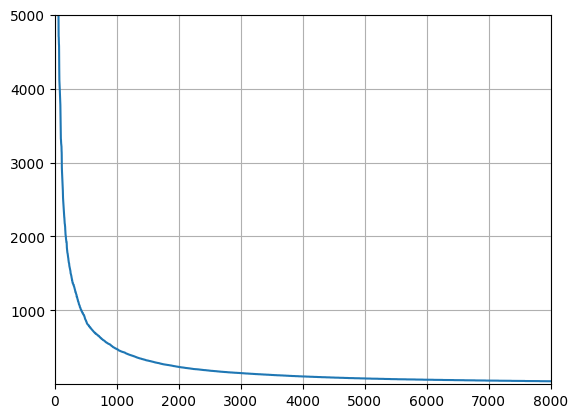

In [11]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


In [12]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'organization',
 'can',
 'state',
 'gmt',
 'one',
 'ohio',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'like',
 'people',
 'university',
 'just',
 'posting',
 'nntp',
 'know',
 'mps',
 'host',
 'sci',
 'get',
 'usenet',
 'zaphod',
 'think',
 'may',
 'alt',
 'politics',
 'windows',
 'also',
 'rutgers',
 'use',
 'harvard',
 'near',
 'time',
 'new',
 'eng',
 'rec',
 'soc',
 'noc',
 'good',
 'system',
 'sei',
 'crabapple',
 'well',
 'das',
 'xref',
 'now',
 'even',
 'cis',
 'god',
 'see',
 'religion',
 'europa',
 'gtefsd',
 'uunet',
 'world',
 'ece',
 'way',
 'christian',
 'org',
 'two',
 'many',
 'say',
 'gov',
 'make',
 'much',
 'first',
 'rochester',
 'right',
 'distribution',
 'club',
 'space',
 'mail',
 'gatech',
 'ibm',
 'want',
 'andrew',
 'anyone',
 'cultur

In [13]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [14]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [15]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[11  4  0 ...  0  0  0]
 [ 6  2  8 ...  0  0  0]
 [ 5  1  0 ...  0  0  0]
 ...
 [ 7  3  0 ...  0  0  0]
 [ 6  1  0 ...  0  0  0]
 [ 5  4  9 ...  0  0  0]]
--------------------------
[[10  2  5 ...  0  0  0]
 [ 3  3  3 ...  0  0  0]
 [ 5  1  0 ...  0  0  0]
 ...
 [ 7  4  5 ...  0  0  0]
 [16  3  1 ...  0  0  0]
 [ 6  3  3 ...  0  0  0]]


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [17]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on training data: 0.8925785157031406
Score on testing data: 0.8672
[[190   0   1   0   0   0   0   0   3   0   0   0   0   0   1   2   0   1
    0  38]
 [  0 147  16  14   7  13   7   4   0   1   0   0   2   2   1   0   0   0
    0   0]
 [  0   1 209  12   1  17   5   0   0   0   0   1   1   0   0   0   0   0
    0   0]
 [  0   3   8 218  24   1   3   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   2  15 200   0   5   0   0   0   0   0   2   0   1   0   0   0
    0   0]
 [  0  15  23   6   1 235   3   0   2   0   0   0   1   1   1   0   0   0
    0   0]
 [  0   0   1   4   1   0 237   3   0   0   0   0   1   0   1   0   0   0
    1   0]
 [  0   0   0   0   0   0  11 220  12   0   1   0   4   0   2   0   1   0
    1   1]
 [  0   1   0   0   0   0   5   2 238   2   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   4   3 234  12   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   1   1   0   2   9 243   0   0   0   1   0   0   0
   

# Self Implementation of Naive Baye's

In [18]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count


In [19]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [20]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [21]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [22]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [23]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)


In [24]:
dictionary

{'total_doc': 14997,
 'talk.politics.guns': {'edu': 7250,
  'cmu': 2432,
  'com': 2840,
  'news': 1379,
  'not': 1455,
  'srv': 1343,
  'cantaloupe': 1009,
  'net': 826,
  'message': 807,
  'subject': 813,
  'lines': 772,
  'date': 791,
  'apr': 803,
  'newsgroups': 762,
  'path': 755,
  'organization': 754,
  'can': 705,
  'state': 1185,
  'gmt': 688,
  'one': 662,
  'ohio': 880,
  'will': 650,
  'writes': 712,
  'article': 711,
  'comp': 3,
  'references': 646,
  'talk': 1356,
  'misc': 279,
  'ans': 428,
  'sender': 357,
  'howland': 424,
  'reston': 425,
  'don': 543,
  'like': 461,
  'people': 797,
  'university': 351,
  'just': 455,
  'posting': 409,
  'nntp': 391,
  'know': 326,
  'mps': 479,
  'host': 371,
  'sci': 6,
  'get': 398,
  'usenet': 508,
  'zaphod': 424,
  'think': 411,
  'may': 183,
  'alt': 459,
  'politics': 1374,
  'windows': 11,
  'also': 256,
  'rutgers': 13,
  'use': 275,
  'harvard': 148,
  'near': 202,
  'time': 335,
  'new': 161,
  'eng': 365,
  'rec': 37,


In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [26]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on testing_data: 0.882
[[197   0   1   1   0   0   0   1   3   0   0   0   1   2   0   1   0   1
    1  27]
 [  0 156  12  16   6  10   6   1   1   0   0   1   3   1   1   0   0   0
    0   0]
 [  0  11 197   9   2  24   2   0   0   0   0   0   1   1   0   0   0   0
    0   0]
 [  0   7   2 231  15   0   2   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   1  12 204   0   7   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  16  19   4   2 243   1   0   1   0   0   0   1   1   0   0   0   0
    0   0]
 [  0   0   1   5   3   0 229   5   0   0   0   0   4   0   2   0   0   0
    0   0]
 [  0   0   0   0   0   0   9 228   7   0   0   0   5   0   0   0   3   0
    1   0]
 [  0   1   0   0   0   0   3   1 242   0   0   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   1   0   0 241  12   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   1   3   7 246   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   0   0   1   0   0   

RESULT:

We have performed text-classification both by sklearn and self implementation.

We found out that sklearn gave score of 0.86 on testing_data,whereas self implemented classifier gave 0.87 on testing data,which is very close.

